| **Inicio** | **atrás 14** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./14_Machine_Learning.ipynb)|

# **141. Regresión en árboles de decisión**

La regresión en árboles de decisión es una técnica que utiliza árboles para modelar la relación entre variables de entrada y salida en un conjunto de datos continuo. A diferencia de la clasificación, donde el objetivo es predecir la clase de un objeto, la regresión se utiliza cuando la variable objetivo es numérica.

Voy a explicar el proceso paso a paso utilizando un ejemplo en Python con la biblioteca `scikit-learn`. Primero, asegúrate de tener la biblioteca instalada:

```bash
pip install scikit-learn
```

Ahora, crearemos un conjunto de datos de ejemplo y entrenaremos un modelo de regresión de árbol de decisión.

Mean Squared Error: 0.013023625342553986


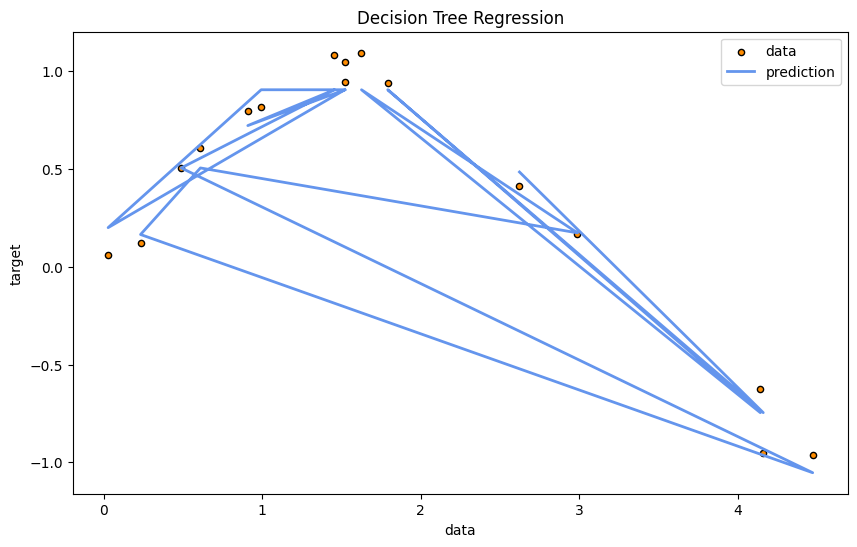

In [1]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generar datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Explicación del código:

1. **Generar datos de ejemplo**: Creamos un conjunto de datos sintéticos utilizando la función seno con algo de ruido.

2. **Dividir el conjunto de datos**: Separamos el conjunto de datos en conjuntos de entrenamiento y prueba.

3. **Crear y entrenar el modelo**: Creamos un modelo de regresión de árbol de decisión y lo entrenamos con los datos de entrenamiento.

4. **Hacer predicciones**: Utilizamos el modelo entrenado para hacer predicciones en el conjunto de prueba.

5. **Evaluar el rendimiento del modelo**: Calculamos el error cuadrático medio para evaluar la precisión del modelo.

6. **Visualizar los resultados**: Mostramos gráficamente los datos reales, las predicciones y el árbol de decisión.

Espero que esta explicación detallada te sea útil.

# **142. Ejemplo de código y ajuste de hiperparámetros del árbol de regresión**

Ajustar los hiperparámetros de un modelo es una parte esencial del proceso de entrenamiento para mejorar su rendimiento. Los hiperparámetros son configuraciones externas al modelo que afectan su capacidad para aprender de los datos. Para los árboles de decisión en regresión, algunos de los hiperparámetros clave incluyen la profundidad máxima del árbol y el número mínimo de muestras requeridas para dividir un nodo.

Aquí hay un ejemplo en Python utilizando `scikit-learn` para ilustrar cómo ajustar los hiperparámetros de un árbol de regresión y visualizar los resultados:

Mean Squared Error: 0.010623617863153162


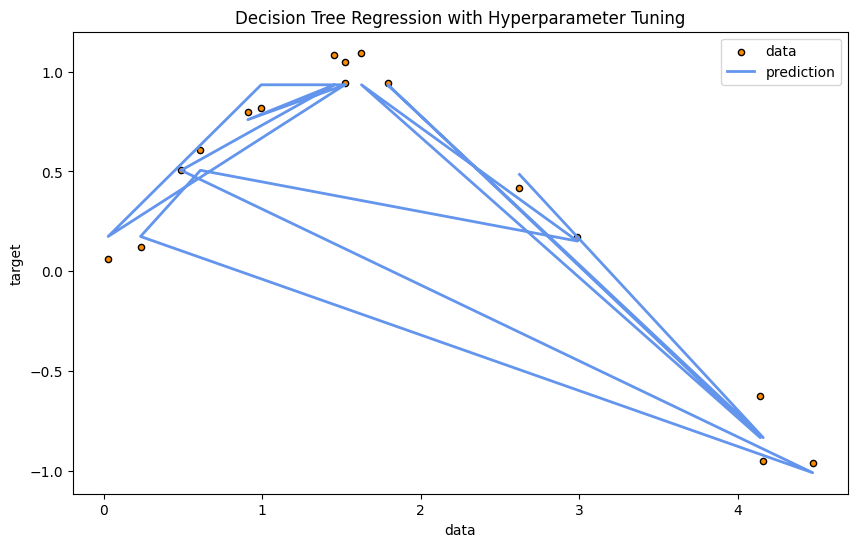

Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [2]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generar datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de árbol de decisión
regressor = DecisionTreeRegressor()

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo después de la búsqueda
best_regressor = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_regressor.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression with Hyperparameter Tuning")
plt.legend()
plt.show()

# Mostrar los mejores hiperparámetros encontrados
print("Best Hyperparameters:", grid_search.best_params_)

Explicación detallada:

1. **Generar datos de ejemplo**: Creamos un conjunto de datos sintéticos similar al ejemplo anterior.

2. **Dividir el conjunto de datos**: Dividimos los datos en conjuntos de entrenamiento y prueba.

3. **Definir el modelo de árbol de decisión**: Creamos una instancia del modelo de árbol de decisión.

4. **Definir la cuadrícula de hiperparámetros a explorar**: Especificamos los valores que queremos probar para los hiperparámetros relevantes.

5. **Configurar la búsqueda de hiperparámetros**: Utilizamos la validación cruzada para evaluar el rendimiento de diferentes combinaciones de hiperparámetros.

6. **Realizar la búsqueda de hiperparámetros**: Entrenamos el modelo con diferentes combinaciones de hiperparámetros y encontramos la mejor combinación.

7. **Obtener el mejor modelo**: Obtenemos el modelo con los hiperparámetros óptimos.

8. **Hacer predicciones y evaluar el modelo**: Utilizamos el mejor modelo para hacer predicciones en el conjunto de prueba y evaluamos su rendimiento.

9. **Visualizar los resultados**: Mostramos gráficamente los datos reales, las predicciones y el árbol de decisión resultante.

10. **Mostrar los mejores hiperparámetros encontrados**: Imprimimos los mejores hiperparámetros encontrados durante la búsqueda.

Ajustar los hiperparámetros es crucial para mejorar el rendimiento del modelo y evitar el sobreajuste o subajuste. La visualización también es útil para comprender cómo el modelo se ajusta a los datos.

# **143. Ecuación de un Hiperplano en N dimensiones**

Un hiperplano en $(N)$-dimensiones es un subconjunto afín de dimensión $(N-1)$. En un espacio bidimensional $(N=2)$, un hiperplano es simplemente una línea. En un espacio tridimensional $(N=3)$, es un plano, y así sucesivamente. La ecuación general de un hiperplano en $(N)$-dimensiones se puede expresar como:

$a_1x_1 + a_2x_2 + \ldots + a_Nx_N + b = 0$

donde $(a_1, a_2, \ldots, a_N)$ son los coeficientes que definen la normal al hiperplano, $(x_1, x_2, \ldots, x_N)$ son las coordenadas de un punto en el hiperplano, y $(b)$ es la constante de sesgo.

Voy a proporcionar un ejemplo en Python utilizando la biblioteca `matplotlib` para visualizar un hiperplano en 2D. Aquí, consideraremos un espacio bidimensional $(N=2)$ y la ecuación del hiperplano será $(ax + by + c = 0)$.

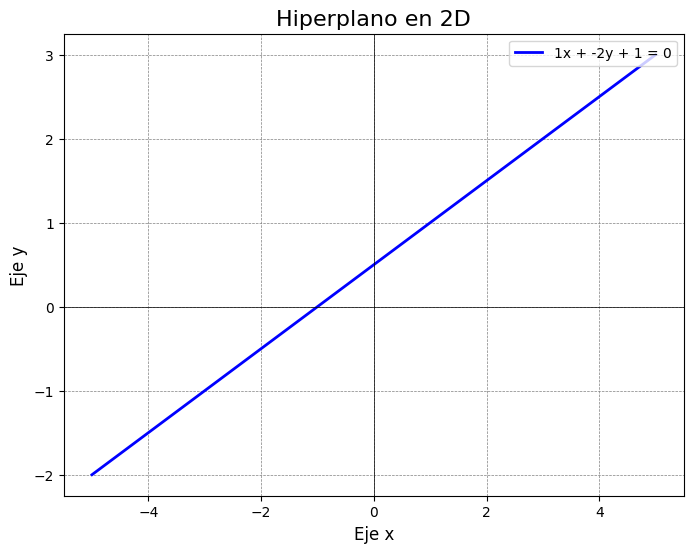

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coeficientes del hiperplano
a = 1
b = -2
c = 1

# Generar datos para visualización
x = np.linspace(-5, 5, 100)
y = (-a*x - c) / b

# Visualizar el hiperplano con personalizaciones
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0', color='blue', linestyle='-', linewidth=2)

# Añadir ejes y cuadrícula
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Añadir etiquetas y título
plt.title('Hiperplano en 2D', fontsize=16)
plt.xlabel('Eje x', fontsize=12)
plt.ylabel('Eje y', fontsize=12)

# Añadir leyenda en una ubicación específica
plt.legend(loc='upper right')

# Mostrar la gráfica
plt.show()

Explicación detallada:

1. **Coeficientes del hiperplano**: En este ejemplo, $(a=1)$, $(b=-2)$, y $(c=1)$ son los coeficientes de la ecuación del hiperplano.

2. **Generar datos para visualización**: Utilizamos `numpy` para generar puntos a lo largo del eje $(x)$ y calculamos los valores correspondientes en el eje $(y)$ para satisfacer la ecuación del hiperplano.

3. **Visualizar el hiperplano**: Utilizamos `matplotlib` para trazar el hiperplano en 2D. La línea creada representa el hiperplano definido por la ecuación dada.

4. **Agregar líneas de referencia y cuadrícula**: Agregamos líneas de referencia en $(x=0)$ e $(y=0)$ y una cuadrícula para mejorar la visualización.

Este ejemplo es en 2D, pero el concepto se extiende a dimensiones superiores. En espacios $(N)$-dimensionales, el hiperplano sería definido por $(a_1x_1 + a_2x_2 + \ldots + a_Nx_N + b = 0)$, y visualizarlo directamente se vuelve más difícil a medida que $(N)$ aumenta, pero la idea es la misma. La ecuación define un conjunto de puntos en el espacio $(N)$-dimensional que forman el hiperplano.

# **144. Regresión lógica | Introducción**

La regresión logística es un método utilizado para realizar predicciones en problemas de clasificación. Aunque el nombre incluye la palabra "regresión", en realidad se utiliza para problemas de clasificación binaria, donde el objetivo es asignar una etiqueta a una observación, por ejemplo, predecir si un correo electrónico es spam o no spam.

**Conceptos Básicos:**

**Función Sigmoide:**
En la regresión logística, la función sigmoide es fundamental. La función sigmoide transforma cualquier valor real en el rango (0, 1) y se define como:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Donde $(z)$ es la combinación lineal de las características y los pesos del modelo.

**Modelo de Regresión Logística:**

La ecuación del modelo de regresión logística es:

$P(y=1) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n)}}$

Donde:
- $P(y=1)$ es la probabilidad de que la clase sea 1.
- $(b_0, b_1, b_2, \ldots, b_n)$ son los coeficientes del modelo.
- $(x_1, x_2, \ldots, x_n)$ son las características de entrada.

**Ejemplo en Python:**

Vamos a crear un ejemplo simple de regresión logística utilizando la biblioteca `scikit-learn`. En este ejemplo, generaremos datos sintéticos y luego ajustaremos un modelo de regresión logística.

Accuracy: 1.0


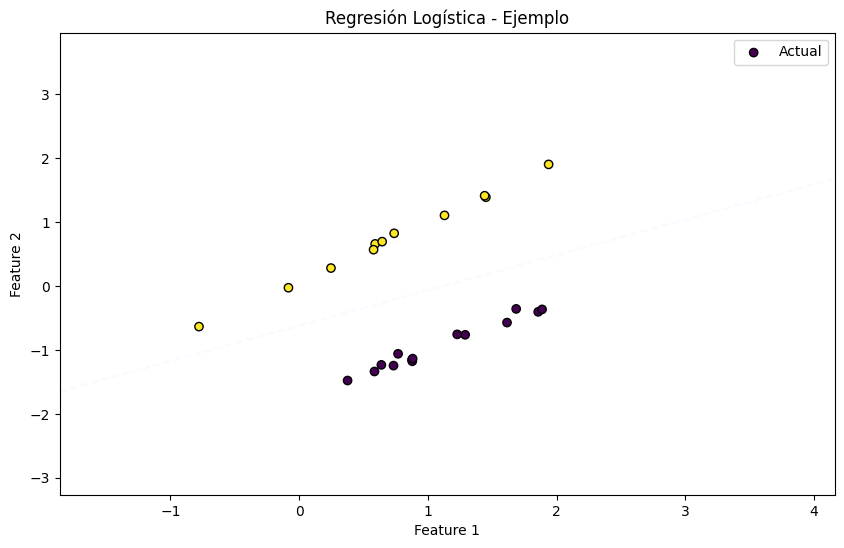

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos sintéticos para clasificación binaria
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Plot de los puntos de datos
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k', label='Actual')

# Crear una malla para visualizar la frontera de decisión
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot de la frontera de decisión
plt.contour(xx, yy, Z, cmap='Blues', levels=[0.5], linestyles='dashed')

# Agregar leyenda
plt.legend(labels=['Actual', 'Decision Boundary'])

plt.title('Regresión Logística - Ejemplo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Explicación detallada:

1. **Generar datos sintéticos**: Utilizamos `make_classification` de `scikit-learn` para generar un conjunto de datos sintéticos para clasificación binaria.

2. **Dividir el conjunto de datos**: Separamos los datos en conjuntos de entrenamiento y prueba.

3. **Crear y entrenar el modelo**: Creamos un modelo de regresión logística y lo entrenamos con los datos de entrenamiento.

4. **Hacer predicciones y evaluar el modelo**: Utilizamos el modelo para hacer predicciones en el conjunto de prueba y calculamos la precisión del modelo.

5. **Visualizar los resultados**: Mostramos gráficamente los puntos de datos y la frontera de decisión del modelo en un gráfico bidimensional.

Este es un ejemplo simple para ilustrar el proceso de regresión logística. En problemas del mundo real, el conjunto de datos y el modelo serían más complejos, pero el principio básico sigue siendo el mismo. La regresión logística es una herramienta poderosa para abordar problemas de clasificación binaria.

# **145. Regresión logística | Intuición geométrica**

La regresión logística se basa en la intuición geométrica de separar clases en un espacio bidimensional o tridimensional. La idea fundamental es encontrar un hiperplano que pueda dividir efectivamente las clases en función de las características de entrada. Vamos a explorar la intuición geométrica detrás de la regresión logística utilizando un ejemplo simple en un espacio bidimensional.

**Intuición Geométrica:**

1. **Espacio Bidimensional**: Imagina que tus datos tienen solo dos características (por ejemplo, $(x_1)$ y $(x_2)$, y deseas clasificarlos en dos clases: 0 y 1.

2. **Función Sigmoide**: La función sigmoide transforma la combinación lineal de las características en un valor entre 0 y 1. Esta función se interpreta como la probabilidad de que una observación pertenezca a la clase 1.

$P(y=1) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2)}}$

3. **Frontera de Decisión**: La ecuación anterior define una curva en el espacio bidimensional donde $(P(y=1) = 0.5)$. Esta curva se llama la **frontera de decisión**.

4. **Decision Boundary Interpretation**: La frontera de decisión es el lugar donde la probabilidad de pertenecer a la clase 1 es igual a la probabilidad de pertenecer a la clase 0. En otras palabras, es donde el modelo toma una decisión sobre la clase a la que asigna una observación.

**Ejemplo en Python:**

Vamos a visualizar la intuición geométrica utilizando un conjunto de datos sintéticos y trazando la frontera de decisión en un espacio bidimensional.

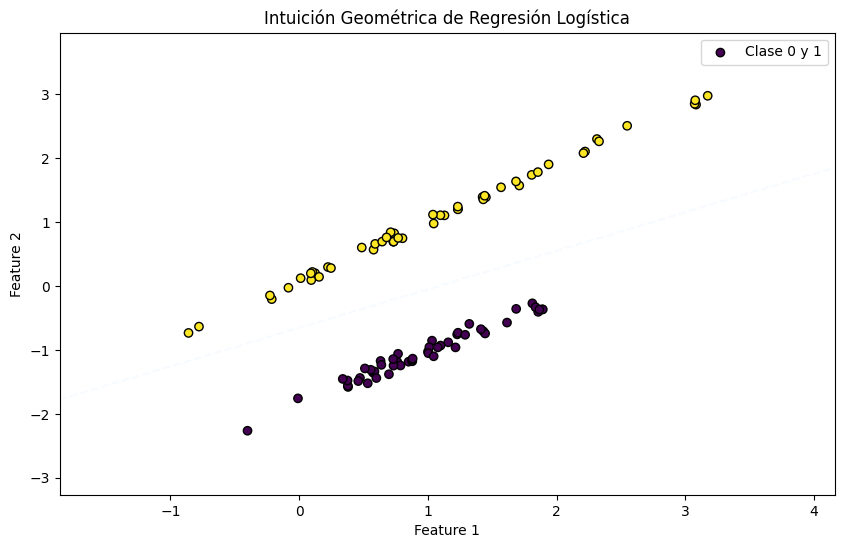

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generar datos sintéticos para clasificación binaria
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Crear una malla para visualizar la frontera de decisión
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Plot de los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k', label='Clase 0 y 1')

# Plot de la frontera de decisión
plt.contour(xx, yy, Z, cmap='Blues', levels=[0.5], linestyles='dashed')

# Agregar leyenda
plt.legend(labels=['Clase 0 y 1', 'Frontera de Decisión'])

plt.title('Intuición Geométrica de Regresión Logística')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

En este ejemplo, verás puntos de datos dispersos en el espacio bidimensional y una línea discontinua que representa la frontera de decisión. Los puntos a un lado de la línea se clasifican como una clase, y los puntos al otro lado se clasifican como la otra clase. La regresión logística busca encontrar la mejor frontera de decisión para separar las clases de manera óptima en función de los datos de entrenamiento.

# **146. Función sigmoidea y aplastamiento | Regresión logística**

La función sigmoide es crucial en la regresión logística para transformar la combinación lineal de características y coeficientes en una probabilidad en el rango de 0 a 1. La forma de la función sigmoide es una curva en forma de "S", y tiene la siguiente expresión matemática:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

donde $(z)$ es la combinación lineal de las características y coeficientes del modelo de regresión logística.

**Intuición de la Función Sigmoide:**

1. **Rango de la Función**: La función sigmoide toma cualquier valor real y lo transforma a un valor entre 0 y 1.

2. **Interpretación Probabilística**: La salida de la función sigmoide se interpreta como la probabilidad de que una observación pertenezca a la clase positiva (1). Por ejemplo, si $(\sigma(z) = 0.8)$, entonces hay un 80% de probabilidad de que la observación pertenezca a la clase positiva.

3. **Aplastamiento de los Extremos**: A medida que $(z)$ se vuelve grande (positivo o negativo), $(e^{-z})$ se aproxima a 0, y $(\sigma(z))$ se aproxima a 1. De manera similar, cuando $(z)$ es muy pequeño, $(e^{-z})$ se aproxima a 1, y $(\sigma(z))$ se aproxima a 0. Esto provoca un "aplastamiento" de los extremos de la curva sigmoide.

**Ejemplo en Python:**

Vamos a visualizar la función sigmoide y cómo aplasta los extremos a medida que $(z)$ aumenta o disminuye. Utilizaremos la biblioteca `matplotlib` para graficar la función sigmoide.

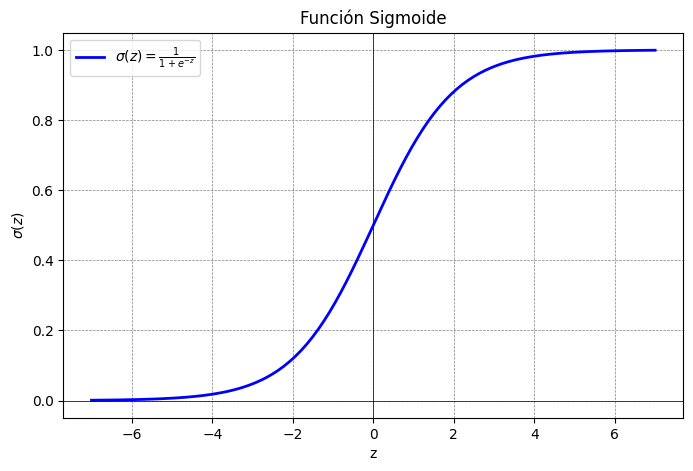

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generar valores de z
z_values = np.linspace(-7, 7, 200)

# Calcular los valores de la función sigmoide
sigmoid_values = sigmoid(z_values)

# Visualizar la función sigmoide
plt.figure(figsize=(8, 5))
plt.plot(z_values, sigmoid_values, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='blue', linewidth=2)

# Añadir líneas de referencia
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Añadir etiquetas y título
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel(r'$\sigma(z)$')

# Mostrar la cuadrícula
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Añadir leyenda
plt.legend()

plt.show()

Este código genera una gráfica de la función sigmoide en el rango de -7 a 7. Observarás que la función se aplasta a medida que $(z)$ se aleja de 0 en ambas direcciones, cumpliendo con la propiedad de que $(\sigma(z))$ se encuentra entre 0 y 1.

# **147. El problema de los valores atípicos | Regresión logística**

El problema de los valores atípicos es una preocupación en la regresión logística y en muchos otros métodos estadísticos y de aprendizaje automático. Los valores atípicos pueden afectar negativamente la calidad y la interpretación del modelo, ya que pueden ejercer una influencia desproporcionada en la estimación de los coeficientes.

**¿Qué son los valores atípicos?**

Los valores atípicos, también conocidos como outliers, son observaciones que se desvían significativamente del resto de los datos. Estos valores pueden surgir por errores en la entrada de datos, mediciones inusuales o situaciones inesperadas.

**Impacto de los valores atípicos en la Regresión Logística:**

1. **Influencia en los Coeficientes**: Los valores atípicos pueden influir en gran medida en los coeficientes estimados de la regresión logística, llevándolos a valores que no representan bien la relación entre las características y la variable objetivo.

2. **Cambios en las Predicciones**: Los valores atípicos pueden afectar las predicciones del modelo, ya que pueden influir en la posición de la frontera de decisión.

**Estrategias para Manejar Valores Atípicos:**

1. **Identificación y Tratamiento**: Es importante identificar los valores atípicos en los datos y decidir cómo manejarlos. En algunos casos, podría ser apropiado eliminarlos o transformarlos.

2. **Transformaciones**: Aplicar transformaciones a las características o a la variable dependiente puede reducir la influencia de los valores atípicos.

3. **Modelos Robustos**: Algunos modelos, como la regresión robusta, están diseñados para manejar mejor los valores atípicos.

**Ejemplo en Python:**

Vamos a generar un ejemplo simple en Python utilizando la regresión logística y agregar algunos valores atípicos para observar cómo afectan el modelo.

Accuracy: 1.0


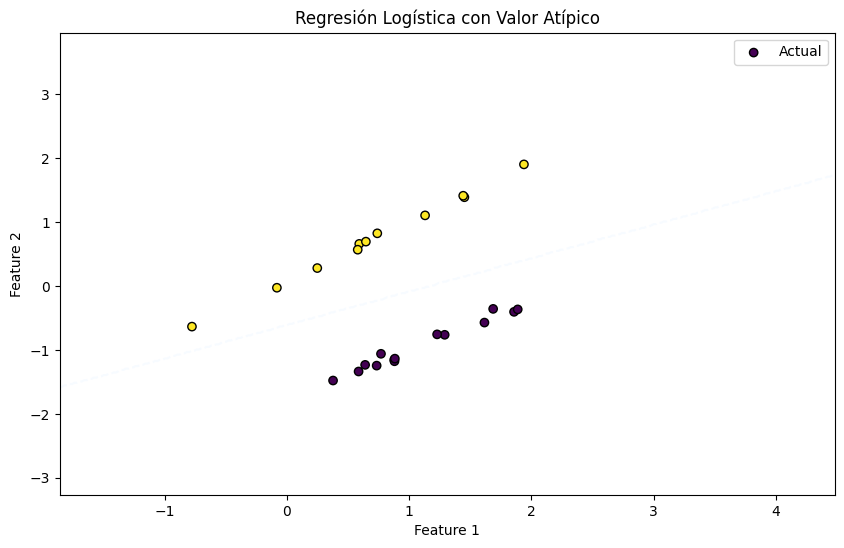

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos sintéticos para clasificación binaria
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Introducir valores atípicos
X[95] = [3.5, 2.0]  # Valor atípico en la posición 95
y[95] = 1           # La clase se cambia a 1 para ser un valor atípico

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualizar los resultados
plt.figure(figsize=(10, 6))

# Plot de los puntos de datos
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k', label='Actual')

# Crear una malla para visualizar la frontera de decisión
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot de la frontera de decisión
plt.contour(xx, yy, Z, cmap='Blues', levels=[0.5], linestyles='dashed')

# Añadir leyenda
plt.legend(labels=['Actual', 'Frontera de Decisión'])

plt.title('Regresión Logística con Valor Atípico')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

En este ejemplo, hemos introducido deliberadamente un valor atípico en la posición 95 de los datos. Observa cómo afecta la frontera de decisión y, en consecuencia, la precisión del modelo. En situaciones prácticas, es crucial identificar y gestionar los valores atípicos de manera adecuada para obtener resultados de modelado más robustos.

# **148. Métricas de clasificación en aprendizaje automático**

Las métricas de clasificación en aprendizaje automático son herramientas esenciales para evaluar el rendimiento de un modelo en la tarea de clasificación. Aquí, explicaré algunas de las métricas más comunes, incluyendo precisión, recall, F1-score y la matriz de confusión, y proporcionaré ejemplos en código con visualizaciones.

**Precisión (Accuracy):**

La precisión mide la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.

$\text{Precisión} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}$

In [14]:
from sklearn.metrics import accuracy_score

# Ejemplo de uso
y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0]

accuracy = accuracy_score(y_true, y_pred)
print(f'Precisión: {accuracy}')

Precisión: 0.7142857142857143


**Recall (Sensibilidad o Exhaustividad):**

El recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo con respecto al total de instancias positivas reales.

$\text{Recall} = \frac{\text{Número de verdaderos positivos}}{\text{Número total de positivos reales}}$

In [15]:
from sklearn.metrics import recall_score

# Ejemplo de uso
recall = recall_score(y_true, y_pred)
print(f'Recall: {recall}')

Recall: 0.75


**F1-score:**

El F1-score es la media armónica entre precisión y recall. Es útil cuando se busca un equilibrio entre estas dos métricas.

$F1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}$

In [16]:
from sklearn.metrics import f1_score

# Ejemplo de uso
f1 = f1_score(y_true, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.75


**Matriz de Confusión:**

La matriz de confusión es una tabla que muestra el número de predicciones correctas e incorrectas en cada clase.

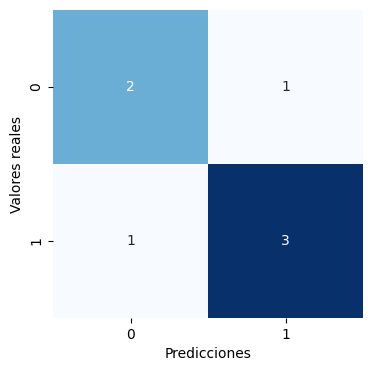

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de uso
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualización
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

Estos son solo algunos ejemplos de métricas de clasificación en aprendizaje automático. Es importante seleccionar las métricas que mejor se adapten a la naturaleza de tu problema y entender sus interpretaciones para realizar evaluaciones más informadas de los modelos clasificadores.

# **149. Regresión lineal | Métricas de regresión | Error absoluto medio | Error cuadrático medio**

En la regresión lineal, las métricas de regresión son herramientas clave para evaluar qué tan bien se ajusta el modelo a los datos. Dos de las métricas más comunes son el Error Absoluto Medio (MAE) y el Error Cuadrático Medio (MSE).

**Error Absoluto Medio (MAE):**

El Error Absoluto Medio es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales.

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{real},i} - y_{\text{pred},i}|$

In [20]:
from sklearn.metrics import mean_absolute_error

# Ejemplo de uso
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')

MAE: 0.5


**Error Cuadrático Medio (MSE):**

El Error Cuadrático Medio es la media de las diferencias al cuadrado entre las predicciones y los valores reales. Es más sensible a errores grandes debido al cuadrado.

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{real},i} - y_{\text{pred},i})^2$

In [19]:
from sklearn.metrics import mean_squared_error

# Ejemplo de uso
mse = mean_squared_error(y_true, y_pred)
print(f'MSE: {mse}')

MSE: 0.2857142857142857


**Visualización:**

Puedes visualizar las predicciones y los valores reales en un gráfico para obtener una representación gráfica del rendimiento del modelo.

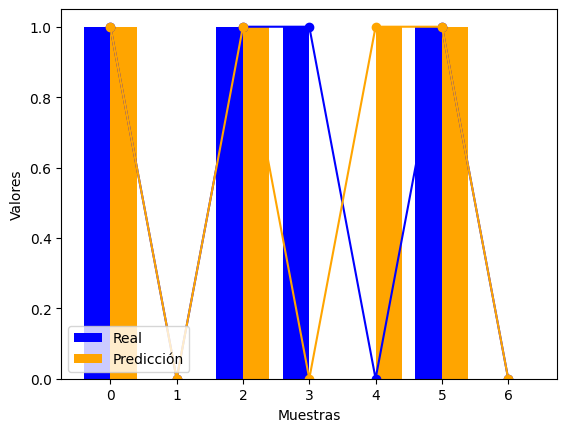

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para visualización
x = np.arange(len(y_true))

# Gráfico de barras para valores reales y predicciones
plt.bar(x - 0.2, y_true, width=0.4, label='Real', color='blue')
plt.bar(x + 0.2, y_pred, width=0.4, label='Predicción', color='orange')

# Línea que conecta valores reales y predicciones
plt.plot(x, y_true, marker='o', linestyle='-', color='blue')
plt.plot(x, y_pred, marker='o', linestyle='-', color='orange')

plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.legend()
plt.show()

Esto proporcionará una representación visual de cómo las predicciones del modelo se comparan con los valores reales.

Estas métricas y visualizaciones te ayudarán a evaluar y comparar modelos de regresión lineal. Es importante elegir las métricas que se ajusten a la naturaleza específica del problema que estás abordando.

| **Inicio** | **atrás 14** |
|----------- |-------------- |
| [🏠](../../README.md) | [⏪](./14_Machine_Learning.ipynb)|